# Predict Price of the computer

A dataframe containing :

price : price in US dollars of 486 PCs

speed : clock speed in MHz

hd : size of hard drive in MB

ram : size of Ram in in MB

screen : size of screen in inches

cd : is a CD-ROM present ?

multi : is a multimedia kit (speakers, sound card) included ?

premium : is the manufacturer was a "premium" firm (IBM, COMPAQ) ?

ads : number of 486 price listings for each month

trend : time trend indicating month starting from January of 1993 to November of 1995.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
comp_data = pd.read_csv("C:\\Excelr Data\\Assignments\\Multi Linear Regression\\Computer_Data.csv")
type(comp_data)

pandas.core.frame.DataFrame

In [3]:
# to get top 6 rows
comp_data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
comp_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
comp_data.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
trend       int64
dtype: object

In [6]:
#comp_data

In [7]:
dummy_comp_data = pd.get_dummies(comp_data)
dummy_comp_data

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,1,0,1,0,0,1
6255,2223,66,850,16,15,39,35,0,1,0,1,0,1
6256,2654,100,1200,24,15,39,35,0,1,1,0,0,1
6257,2195,100,850,16,15,39,35,0,1,1,0,0,1


In [8]:
# Correlation matrix 
dummy_comp_data.corr()

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987,-0.197343,0.197343,0.016651,-0.016651,0.080696,-0.080696
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438,-0.258260,0.258260,-0.084172,0.084172,-0.114208,0.114208
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790,-0.503570,0.503570,-0.092805,0.092805,-0.196924,0.196924
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844,-0.438504,0.438504,-0.045497,0.045497,-0.197145,0.197145
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614,-0.129488,0.129488,0.001740,-0.001740,-0.018745,0.018745
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553,0.061091,-0.061091,0.030394,-0.030394,0.152023,-0.152023
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000,-0.445780,0.445780,-0.210907,0.210907,-0.042107,0.042107
cd_no,-0.197343,-0.258260,-0.503570,-0.438504,-0.129488,0.061091,-0.445780,1.000000,-1.000000,0.432179,-0.432179,0.216077,-0.216077
cd_yes,0.197343,0.258260,0.503570,0.438504,0.129488,-0.061091,0.445780,-1.000000,1.000000,-0.432179,0.432179,-0.216077,0.216077
multi_no,0.016651,-0.084172,-0.092805,-0.045497,0.001740,0.030394,-0.210907,0.432179,-0.432179,1.000000,-1.000000,0.124775,-0.124775


In [9]:
#There is no variable which is highly corelated

In [10]:
type(dummy_comp_data)

pandas.core.frame.DataFrame

In [ ]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(dummy_comp_data.iloc[:,:])

In [1]:
#dummy_comp_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
# columns names
dummy_comp_data.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_no',
       'cd_yes', 'multi_no', 'multi_yes', 'premium_no', 'premium_yes'],
      dtype='object')

In [12]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model      

In [13]:
# Preparing model                  
ml1 = smf.ols('price~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=dummy_comp_data).fit() 
ml1
# regression model

In [14]:
# Getting coefficients of variables               
ml1.params

Intercept       54.398353
speed            9.320281
hd               0.781780
ram             48.255959
screen         123.089042
ads              0.657291
trend          -51.849581
cd_no           -3.259178
cd_yes          57.657531
multi_no       -24.962733
multi_yes       79.361086
premium_no     281.811542
premium_yes   -227.413189
dtype: float64

In [15]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        20:19:29   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.3984     23.865      2.279      0.023       7.614     101.182
speed           9.3203      0.185     50.364      0.000       8.958       9.683
hd              0.7818      0.028     28.311      0.000       0.728       0.836
ram            48.2560      1.066     45.265      0.000      46.166      50.346
screen        123.0890      3.999     30.776      0.000     115.249     130.929
ads             0.6573      0.051     12.809      0.000       0.557       0.758
trend         -51.8496      0.629    -82.470      0.000     -53.082     -50.617
cd_no          -3.2592     12.302     -0.265      0.791     -27.375      20.857
cd_yes         57.6575     13.368      4.313      0.000      31.451      83.864
multi_no      -24.9627     13.135     -1.901      0.057     -50.711       0.786
multi_yes      79.3611     13.318      5.959      0.000      53.252     105.470
premium_no    281.8115     14.194     19.855      0.000     253.987     309.636
premium_yes  -227.4132     12.629    -18.008      0.000    -252.170    -202.657
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     3.57e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
# R-squared:	0.776, Adj. R-squared:	0.775, Pvalue of cd_no=0.791 and multi_no=0.057 both are high

In [17]:
pred = ml1.predict(dummy_comp_data) # Predicted values of AT using the model
pred

0       2020.518889
1       2002.478116
2       2213.968113
3       2793.127639
4       2877.415391
           ...     
6254    1586.853395
6255    2072.985141
6256    2945.221470
6257    2285.550870
6258    2531.728954
Length: 6259, dtype: float64

In [18]:
# preparing model based only on cd_no
ml_cd=smf.ols('price~cd_no',data = dummy_comp_data).fit()  

In [20]:
ml_cd.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     253.5
Date:                Mon, 18 May 2020   Prob (F-statistic):           5.44e-56
Time:                        20:23:14   Log-Likelihood:                -48591.
No. Observations:                6259   AIC:                         9.719e+04
Df Residuals:                    6257   BIC:                         9.720e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2342.6056     10.559    221.849      0.000    2321.905    2363.306
cd_no       -229.7936     14.431    -15.923      0.000    -258.084    -201.503
==============================================================================
Omnibus:                      674.403   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.116
Skew:                           0.834   Prob(JB):                    3.26e-209
Kurtosis:                       3.948   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# R-squared:	0.039, Adj. R-squared:	0.039, Pvalue of cd_no=0.00 
# cd_no is significant

In [22]:
# Preparing model based only on multi_no
ml_multi=smf.ols('price~multi_no',data = dummy_comp_data).fit()  

In [23]:
ml_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.735
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.188
Time:                        20:23:37   Log-Likelihood:                -48715.
No. Observations:                6259   AIC:                         9.743e+04
Df Residuals:                    6257   BIC:                         9.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2195.5567     19.656    111.699      0.000    2157.024    2234.089
multi_no      27.9132     21.189      1.317      0.188     -13.625      69.451
==============================================================================
Omnibus:                      502.366   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.992
Skew:                           0.705   Prob(JB):                    9.71e-143
Kurtosis:                       3.720   Cond. No.                         5.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# R-squared:	0.000, Adj. R-squared:	0.000, Pvalue multi_no=0.188
#pvalue =0.188 it is insignificant

In [26]:
# Preparing model based only on Administration & MarketingSpend
ml_cd_multi=smf.ols('price~cd_no+multi_no',data = dummy_comp_data).fit()  

In [27]:
ml_cd_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     170.6
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.14e-73
Time:                        20:27:07   Log-Likelihood:                -48549.
No. Observations:                6259   AIC:                         9.710e+04
Df Residuals:                    6256   BIC:                         9.712e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2195.5567     19.145    114.679      0.000    2158.026    2233.088
cd_no       -292.8765     15.898    -18.423      0.000    -324.041    -261.712
multi_no     210.1318     22.886      9.182      0.000     165.267     254.997
==============================================================================
Omnibus:                      671.735   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.540
Skew:                           0.832   Prob(JB):                    5.30e-208
Kurtosis:                       3.943   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#R-squared:	0.052,Adj. R-squared:	0.051 and Pvalue of cd_no and multi_no are 0.000 It is significant

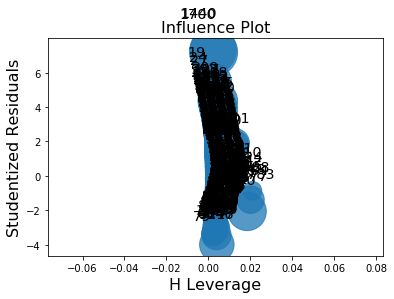

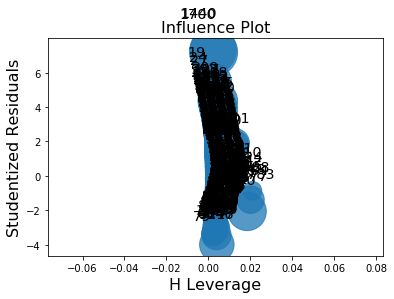

In [29]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
# index 45,46,48 AND 49 is showing high influence so we can exclude that entire row

# Studentized Residuals = Residual/standard deviation of residuals

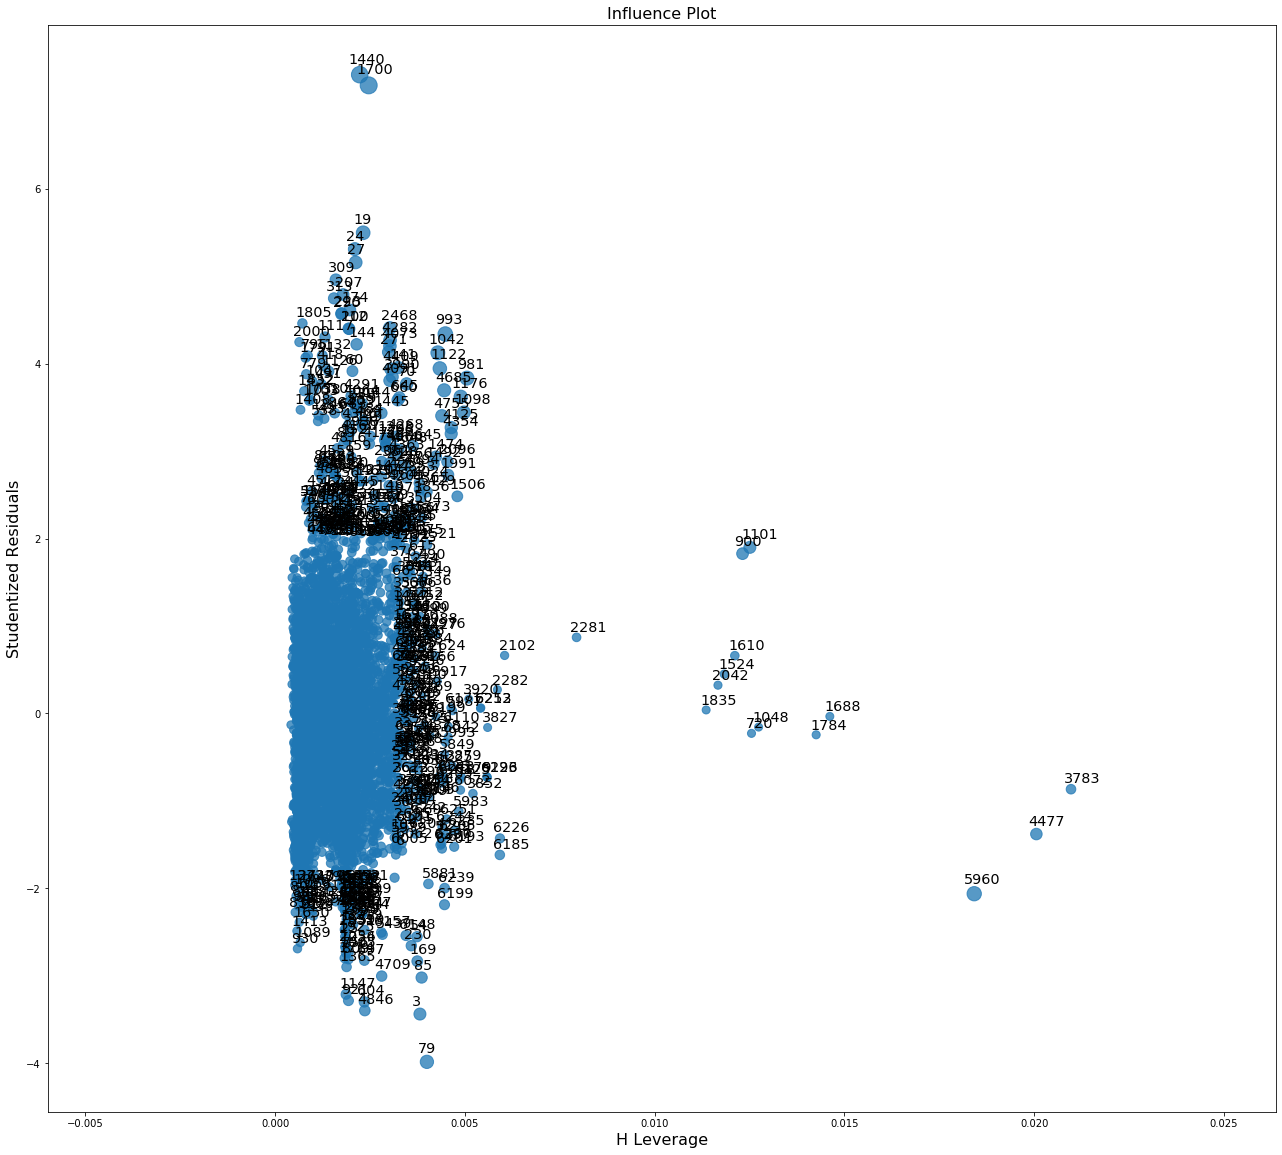

In [30]:
# Checking whether data has any influential values 
# influence index plots

import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(22, 20))
fig = sm.graphics.influence_plot(ml1, ax=ax,size=17)


In [46]:
# index 5960 ,4477,3783, 1101,900,79 is showing high influence so we can exclude that entire row
comp_data_new = dummy_comp_data.drop(dummy_comp_data.index[[5960,4477,3783,1101,900,79,1440,1700]],axis=0) # ,inplace=False)
comp_data_new

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,1,0,1,0,0,1
6255,2223,66,850,16,15,39,35,0,1,0,1,0,1
6256,2654,100,1200,24,15,39,35,0,1,1,0,0,1
6257,2195,100,850,16,15,39,35,0,1,1,0,0,1


In [47]:
# Preparing model                  
ml_new = smf.ols('price~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_new).fit()    

In [49]:
# Getting coefficients of variables        
ml_new.params

Intercept       67.439266
speed            9.290452
hd               0.777689
ram             48.489971
screen         121.108398
ads              0.643097
trend          -51.722414
cd_no            3.238699
cd_yes          64.200567
multi_no       -19.001208
multi_yes       86.440474
premium_no     289.912997
premium_yes   -222.473731
dtype: float64

In [50]:
# Summary
ml_new.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2425.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        21:49:13   Log-Likelihood:                -43920.
No. Observations:                6251   AIC:                         8.786e+04
Df Residuals:                    6241   BIC:                         8.793e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      67.4393     23.657      2.851      0.004      21.063     113.815
speed           9.2905      0.183     50.705      0.000       8.931       9.650
hd              0.7777      0.028     27.289      0.000       0.722       0.834
ram            48.4900      1.077     45.039      0.000      46.379      50.601
screen        121.1084      3.964     30.550      0.000     113.337     128.880
ads             0.6431      0.051     12.625      0.000       0.543       0.743
trend         -51.7224      0.629    -82.187      0.000     -52.956     -50.489
cd_no           3.2387     12.198      0.266      0.791     -20.673      27.150
cd_yes         64.2006     13.249      4.846      0.000      38.228      90.173
multi_no      -19.0012     13.017     -1.460      0.144     -44.520       6.517
multi_yes      86.4405     13.204      6.547      0.000      60.557     112.324
premium_no    289.9130     14.073     20.601      0.000     262.325     317.501
premium_yes  -222.4737     12.513    -17.780      0.000    -247.003    -197.944
==============================================================================
Omnibus:                      829.106   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2099.851
Skew:                           0.750   Prob(JB):                         0.00
Kurtosis:                       5.411   Cond. No.                     4.55e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#R-squared:	0.778, Adj. R-squared:	0.777 and Pvalue of cd_no=0.791 and multi_no=0.144 It is insignificant

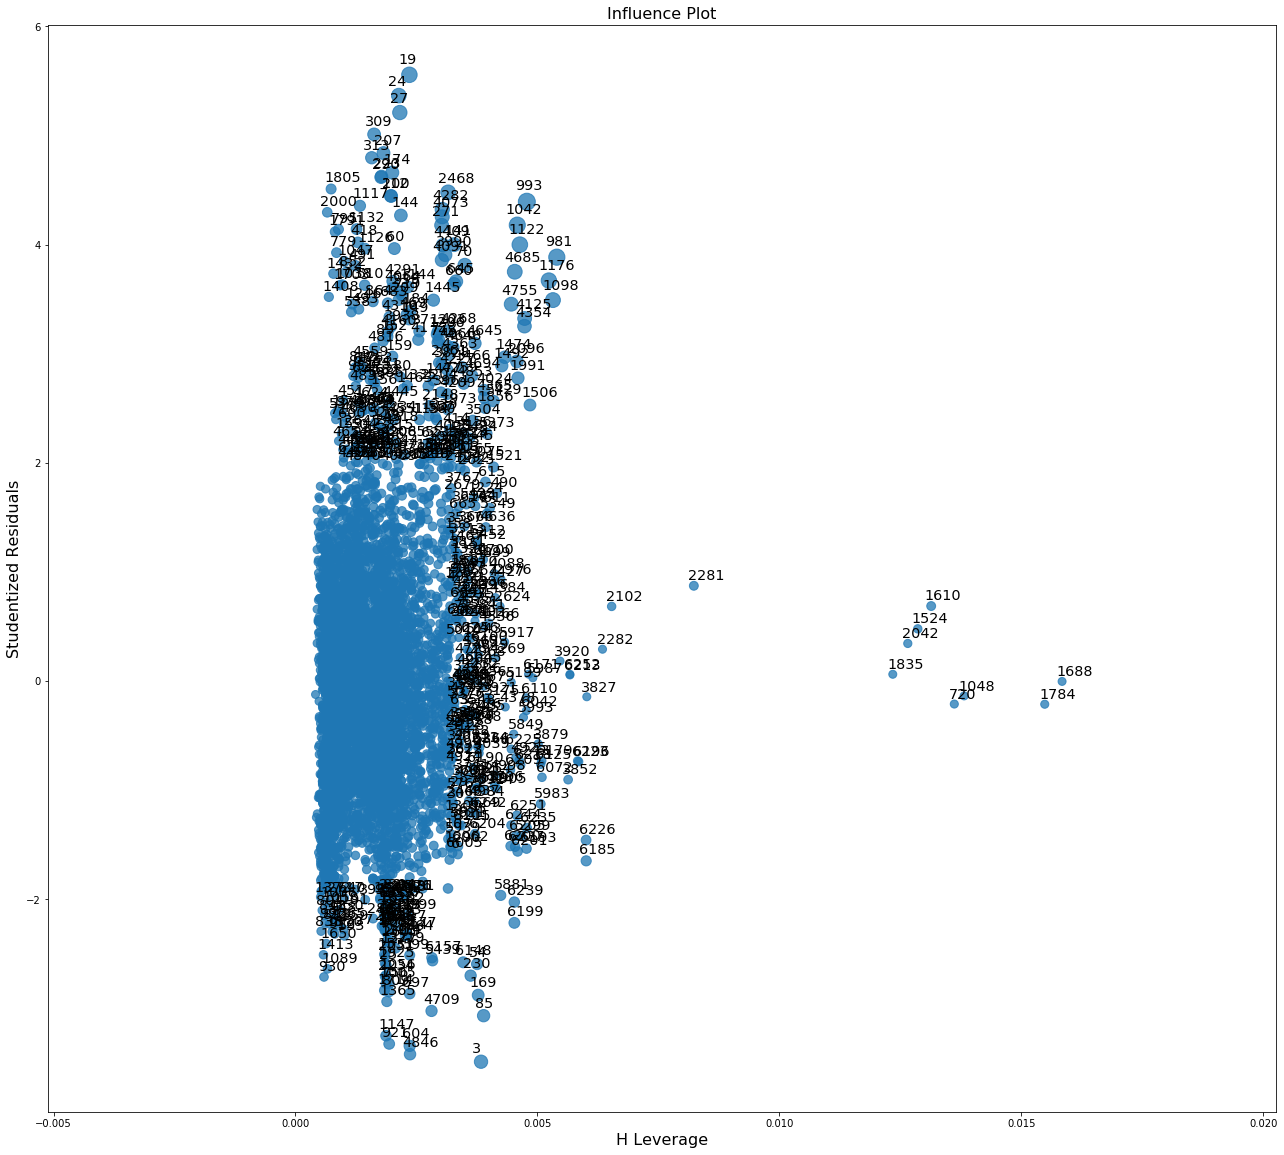

In [52]:
# Checking whether data has any influential values 
# influence index plots

import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(22, 20))
fig = sm.graphics.influence_plot(ml_new, ax=ax,size=17)


In [55]:
# index 1784,1688,720,1048,1835,2042,1524,1610 is showing high influence so we can exclude that entire row
comp_data_1 = dummy_comp_data.drop(dummy_comp_data.index[[1784,1688,720,1048,1835,2042,1524,1610]],axis=0) # ,inplace=False)
comp_data_1

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,1,0,1,0,0,1
6255,2223,66,850,16,15,39,35,0,1,0,1,0,1
6256,2654,100,1200,24,15,39,35,0,1,1,0,0,1
6257,2195,100,850,16,15,39,35,0,1,1,0,0,1


In [56]:
# Preparing model                  
ml_1 = smf.ols('price~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit() 


In [57]:
ml_1.params

Intercept       54.188341
speed            9.322044
hd               0.779280
ram             48.319953
screen         123.139900
ads              0.656066
trend          -51.823933
cd_no           -3.473341
cd_yes          57.661682
multi_no       -25.016165
multi_yes       79.204506
premium_no     281.712037
premium_yes   -227.523696
dtype: float64

In [58]:
ml_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2388.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        21:57:49   Log-Likelihood:                -43987.
No. Observations:                6251   AIC:                         8.799e+04
Df Residuals:                    6241   BIC:                         8.806e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.1883     23.884      2.269      0.023       7.368     101.008
speed           9.3220      0.185     50.303      0.000       8.959       9.685
hd              0.7793      0.029     26.812      0.000       0.722       0.836
ram            48.3200      1.095     44.122      0.000      46.173      50.467
screen        123.1399      4.003     30.761      0.000     115.292     130.987
ads             0.6561      0.051     12.740      0.000       0.555       0.757
trend         -51.8239      0.637    -81.340      0.000     -53.073     -50.575
cd_no          -3.4733     12.319     -0.282      0.778     -27.622      20.676
cd_yes         57.6617     13.379      4.310      0.000      31.434      83.890
multi_no      -25.0162     13.144     -1.903      0.057     -50.783       0.751
multi_yes      79.2045     13.331      5.941      0.000      53.072     105.337
premium_no    281.7120     14.204     19.834      0.000     253.868     309.556
premium_yes  -227.5237     12.638    -18.003      0.000    -252.299    -202.749
==============================================================================
Omnibus:                     1014.230   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3186.554
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       6.076   Cond. No.                     3.08e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
#column names - price~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes

# calculating VIF's values of independent variables
rsq_speed = smf.ols('speed~hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_speed = 1/(1-rsq_speed) 

rsq_hd = smf.ols('hd~speed+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_hd = 1/(1-rsq_hd) 

rsq_ram = smf.ols('ram~speed+hd+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_ram = 1/(1-rsq_ram) 

rsq_screen = smf.ols('screen~speed+hd+ram+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_screen = 1/(1-rsq_screen) 

rsq_ads = smf.ols('ads~speed+hd+ram+screen+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_ads = 1/(1-rsq_ads) 

rsq_trend = smf.ols('trend~speed+hd+ram+screen+ads+cd_no+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_trend = 1/(1-rsq_trend) 

rsq_cd_no = smf.ols('cd_no~speed+hd+ram+screen+ads+trend+cd_yes+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_cd_no = 1/(1-rsq_cd_no) 

rsq_cd_yes = smf.ols('cd_yes~speed+hd+ram+screen+ads+trend+cd_no+multi_no+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_cd_yes = 1/(1-rsq_cd_yes)

rsq_multi_no = smf.ols('multi_no~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_yes+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_multi_no = 1/(1-rsq_multi_no) 

rsq_multi_yes = smf.ols('multi_yes~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+premium_no+premium_yes',data=comp_data_1).fit().rsquared  
vif_multi_yes= 1/(1-rsq_multi_yes) 

rsq_premium_no = smf.ols('premium_no~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_yes',data=comp_data_1).fit().rsquared  
vif_premium_no = 1/(1-rsq_premium_no) 

rsq_premium_yes = smf.ols('premium_yes~speed+hd+ram+screen+ads+trend+cd_no+cd_yes+multi_no+multi_yes+premium_no',data=comp_data_1).fit().rsquared  
vif_premium_yes = 1/(1-rsq_premium_yes) 


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars


In [77]:
# Storing vif values in a data frame
d1 = {'Variables':['speed','hd','ram','screen','ads','trend','cd_no','cd_yes','multi_no','multi_yes','premium_no','premium_yes'],'VIF':[vif_speed,vif_hd,vif_ram,vif_screen,vif_ads,vif_trend,vif_cd_no,vif_cd_yes,vif_multi_no,vif_multi_yes,vif_premium_no,vif_premium_yes]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,speed,1.266383
1,hd,4.574759
2,ram,3.134890
3,screen,1.081817
4,ads,1.223678
5,trend,2.073170
6,cd_no,inf
7,cd_yes,inf
8,multi_no,inf
9,multi_yes,inf


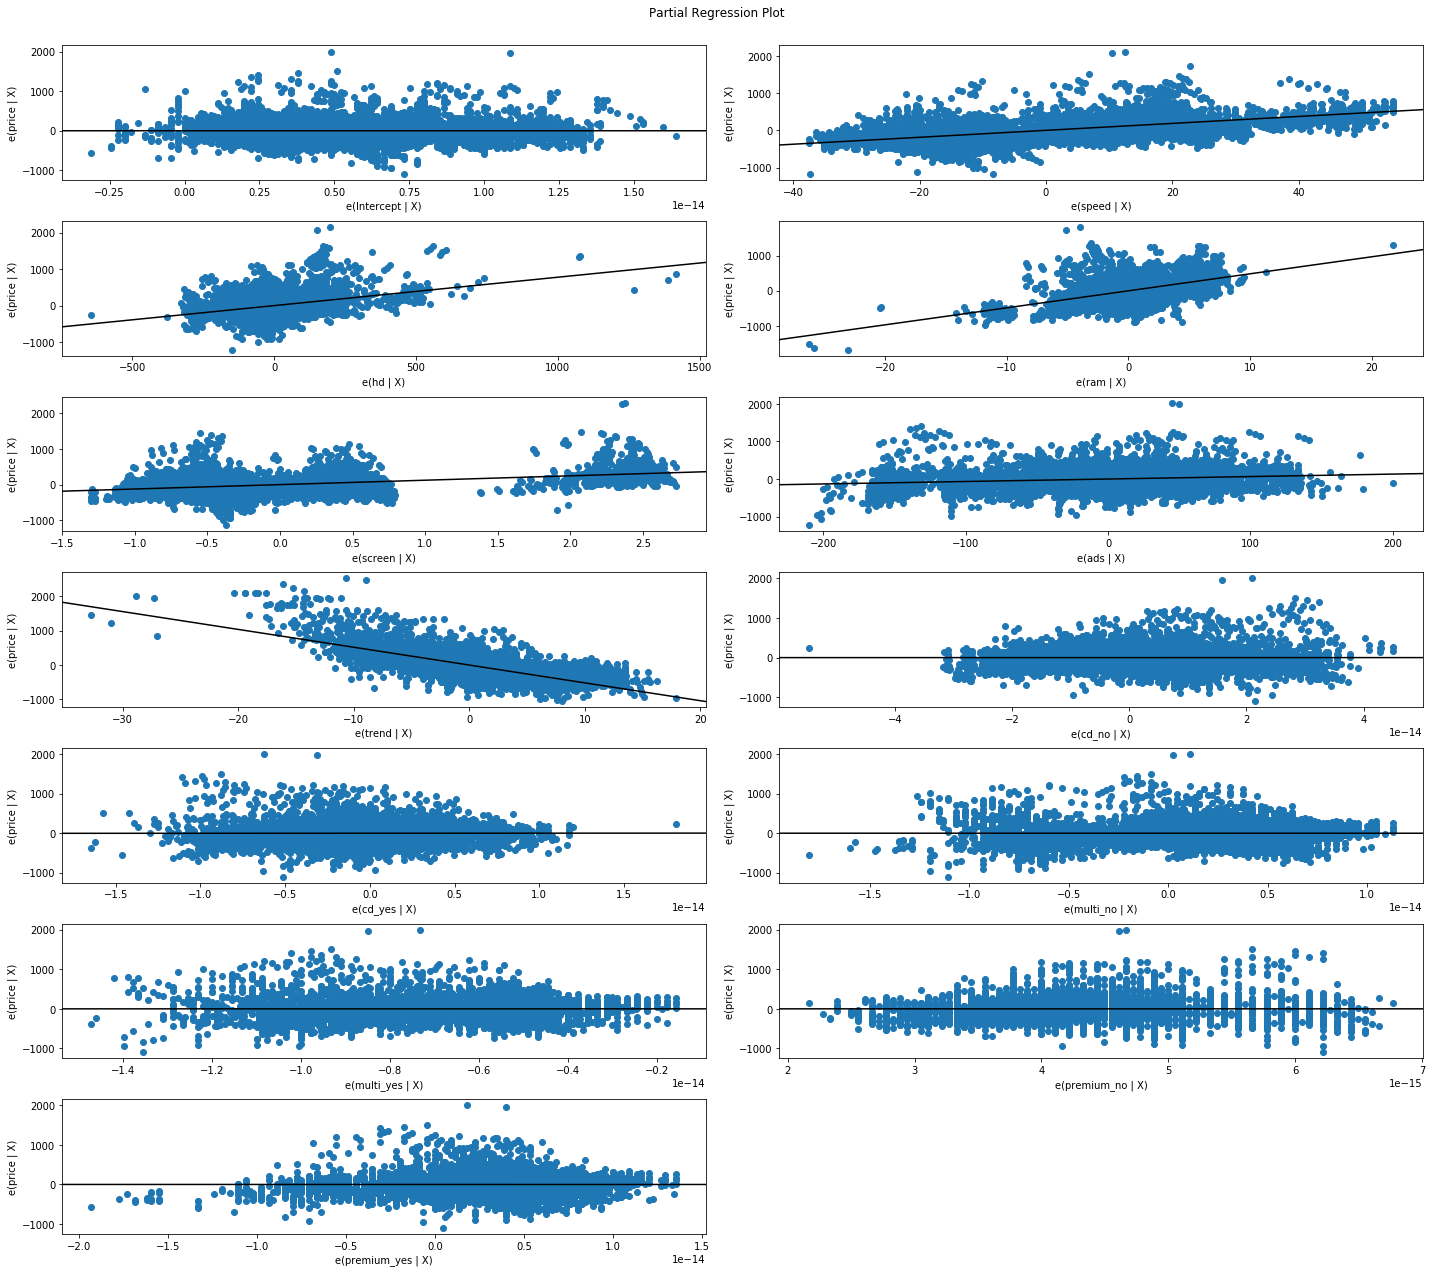

In [79]:
fig=plt.figure(figsize=(20,18))
sm.graphics.plot_partregress_grid(ml_1,fig=fig)
plt.show()# Added varible plot


In [81]:
# Preparing Final model with removing cd_no and multi_no column
ml_final = smf.ols('price~speed+hd+ram+screen+ads+trend+cd_yes+multi_yes+premium_no+premium_yes',data=comp_data_1).fit() 
ml_final

In [82]:
ml_final.params

Intercept       35.195337
speed            9.322044
hd               0.779280
ram             48.319953
screen         123.139900
ads              0.656066
trend          -51.823933
cd_yes          61.135023
multi_yes      104.220672
premium_no     272.215535
premium_yes   -237.020198
dtype: float64

In [83]:
ml_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2388.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        22:43:35   Log-Likelihood:                -43987.
No. Observations:                6251   AIC:                         8.799e+04
Df Residuals:                    6241   BIC:                         8.806e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      35.1953     39.539      0.890      0.373     -42.315     112.705
speed           9.3220      0.185     50.303      0.000       8.959       9.685
hd              0.7793      0.029     26.812      0.000       0.722       0.836
ram            48.3200      1.095     44.122      0.000      46.173      50.467
screen        123.1399      4.003     30.761      0.000     115.292     130.987
ads             0.6561      0.051     12.740      0.000       0.555       0.757
trend         -51.8239      0.637    -81.340      0.000     -53.073     -50.575
cd_yes         61.1350      9.544      6.405      0.000      42.425      79.845
multi_yes     104.2207     11.425      9.122      0.000      81.824     126.617
premium_no    272.2155     21.444     12.694      0.000     230.177     314.254
premium_yes  -237.0202     19.951    -11.880      0.000    -276.132    -197.909
==============================================================================
Omnibus:                     1014.230   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3186.554
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       6.076   Cond. No.                     1.09e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#R-squared:	0.775, Adj. R-squared:	0.775, and Pvalue for all the columns are 0.000
# So, final_ml model is better model

In [84]:
pred_final = ml_final.predict(comp_data_1)
pred_final

0       2020.653340
1       2002.486187
2       2213.928406
3       2793.304050
4       2877.681832
           ...     
6254    1587.246269
6255    2073.140120
6256    2945.176446
6257    2285.868954
6258    2532.148755
Length: 6251, dtype: float64